<a href="https://colab.research.google.com/github/AngelinaCorona/PYTHON/blob/main/Caso_Practico_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso Practico

El objetivo es entender la distribución del contenido por país, tipo, duración, clasificaciones, géneros y su evolución en el tiempo. Este análisis apoyará la estrategia de adquisiciones y contenido original de la plataforma.

## 1. Cargar el archivo 'netflix1.csv' y explorar sus variables principales.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar data set
df = pd.read_csv("netflix1.csv")
print(df.head(5))

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [ ]:
print(df.describe(include = 'object'))

       show_id   type  title   director        country date_added rating  \
count     8790   8790   8790       8790           8790       8790   8790   
unique    8790      2   8787       4528             86       1713     14   
top      s8786  Movie  9-Feb  Not Given  United States   1/1/2020  TV-MA   
freq         1   6126      2       2588           3240        110   3205   

        duration                     listed_in  
count       8790                          8790  
unique       220                           513  
top     1 Season  Dramas, International Movies  
freq        1791                           362  


In [ ]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [ ]:
print(df.shape)

(8790, 10)


## 2. Realizar limpieza de datos :
- Convertir la fecha 'date_added' a formato datetime.
- Separar la duración en número y unidad.
- Identificar y manejar valores nulos relevantes.

In [ ]:
# Convertir date time a fecha

df['date_added'] = pd.to_datetime(df['date_added'])
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [ ]:
# Separar la duracion en numero y unidad

df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').astype
print(df)


     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country date_added  release_year rating   duration  \
0     United States 2

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3658709540.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


In [ ]:
# Identificar y manejar valores nulos relevantes

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


## 3. Análisis exploratorio:
- Identificar los países más activos en producción.
- Examinar la evolución del contenido por año de estreno y año de incorporación al catálogo.
- Analizar la duración promedio de películas y series.
- Explorar la distribución de clasificaciones por tipo de contenido.
- Analizar los géneros más comunes en la plataforma.

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Luxembourg           1
Senegal              1
Belarus              1
Puerto Rico          1
Cyprus               1
Name: count, Length: 86, dtype: int64
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

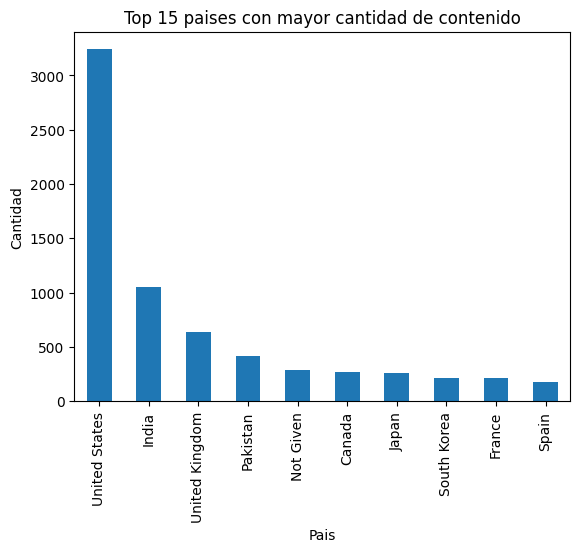

In [ ]:
# Identificar los paises mas activos en produccion

count_por_pais = df['country'].value_counts()
print(count_por_pais)

top_15 = count_por_pais.head(10)
print(top_15)

top_15.plot(
    kind = 'bar',
    title = 'Top 15 paises con mayor cantidad de contenido'
)

plt.xlabel("Pais")
plt.ylabel("Cantidad")
plt.show

release_year
2018    1146
2019    1030
2017    1030
2020     953
2016     901
        ... 
1961       1
1959       1
1925       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64


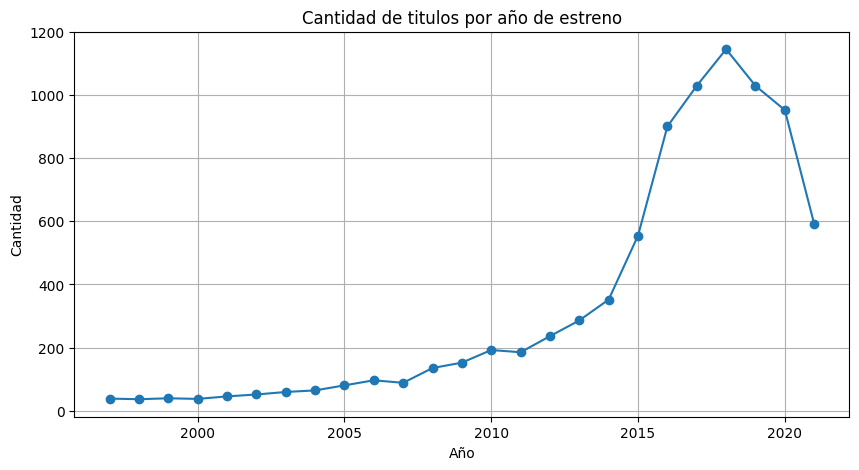

In [ ]:
# Examinar la evolucion del contenido por año de estreno y de incorporacion al catalogo

titulos_por_año = df['release_year'].value_counts()
print(titulos_por_año)

titulos_por_año.sort_index().tail(25).plot(
    kind = 'line',
    marker = 'o',
    figsize = (10,5)
)

plt.title("Cantidad de titulos por año de estreno")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()


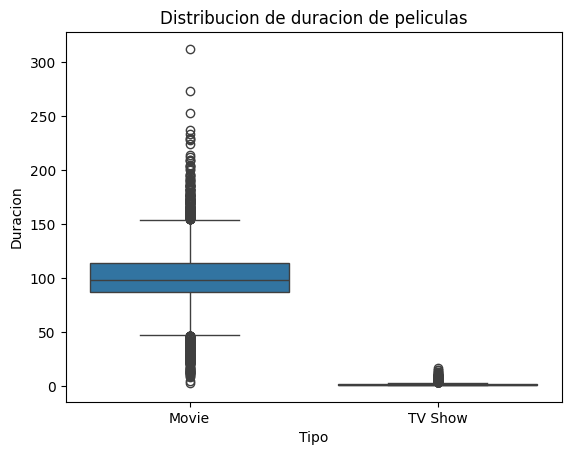

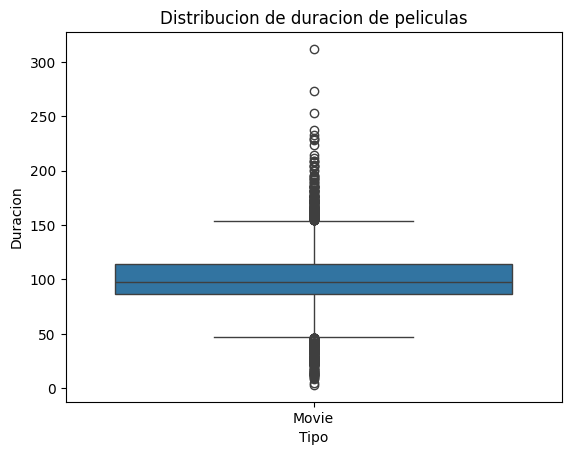

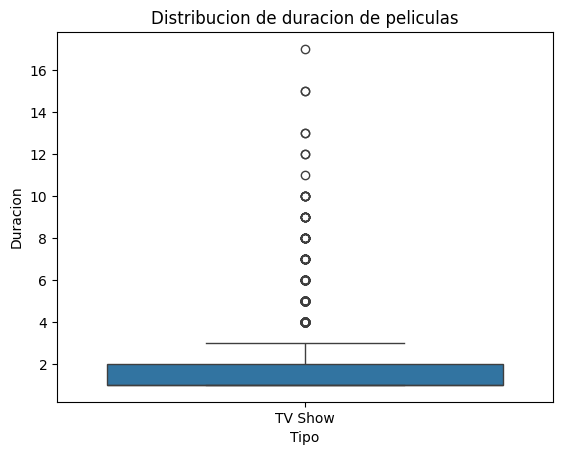

In [ ]:
# Analizar la duración promedio de películas y series.

sns.boxplot(
    x = 'type',
    y = 'duration_num',
    data = df
)
# si se deja solo data=df aparecen ambos pero no se alcanza a visualizar el de series
plt.title("Distribucion de duracion de peliculas")
plt.xlabel("Tipo")
plt.ylabel("Duracion")
plt.show()

# y con este aparece mejor representado el de peliculas
sns.boxplot(
    x = 'type',
    y = 'duration_num',
    data = df[df['type'] == 'Movie']
)

plt.title("Distribucion de duracion de peliculas")
plt.xlabel("Tipo")
plt.ylabel("Duracion")
plt.show()

# y con este aparece mejor representado el de series
sns.boxplot(
    x = 'type',
    y = 'duration_num',
    data = df[df['type'] == 'TV Show']
)

plt.title("Distribucion de duracion de peliculas")
plt.xlabel("Tipo")
plt.ylabel("Duracion")
plt.show()



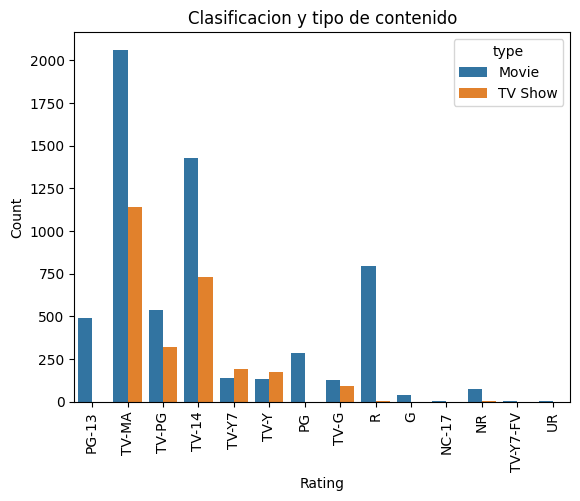

In [ ]:
# Min 3:32 Explorar la distribución de clasificaciones por tipo de contenido.

sns.countplot(
    x = 'rating',
    data = df,
    hue = 'type',
    # order = df['type']
)

plt.title("Clasificacion y tipo de contenido")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Analizar los géneros más comunes en la plataforma.

df_generos = df['listed_in'].str.split(',', expand = True).stack().str.strip()
df_generos_cnt = df_generos.value_counts().reset_index()
print(df_generos_cnt)

                           index  count
0           International Movies   2752
1                         Dramas   2426
2                       Comedies   1674
3         International TV Shows   1349
4                  Documentaries    869
5             Action & Adventure    859
6                      TV Dramas    762
7             Independent Movies    756
8       Children & Family Movies    641
9                Romantic Movies    616
10                     Thrillers    577
11                   TV Comedies    573
12                Crime TV Shows    469
13                      Kids' TV    448
14                    Docuseries    394
15              Music & Musicals    375
16             Romantic TV Shows    370
17                 Horror Movies    357
18               Stand-Up Comedy    343
19                    Reality TV    255
20              British TV Shows    252
21              Sci-Fi & Fantasy    243
22                 Sports Movies    219
23                  Anime Series    174


In [ ]:
# Cambiar el nombre

df_generos_cnt.columns = ['genre','count']
print(df_generos_cnt)

top_10 = df_generos_cnt.head(10)
print(top_10)

                           genre  count
0           International Movies   2752
1                         Dramas   2426
2                       Comedies   1674
3         International TV Shows   1349
4                  Documentaries    869
5             Action & Adventure    859
6                      TV Dramas    762
7             Independent Movies    756
8       Children & Family Movies    641
9                Romantic Movies    616
10                     Thrillers    577
11                   TV Comedies    573
12                Crime TV Shows    469
13                      Kids' TV    448
14                    Docuseries    394
15              Music & Musicals    375
16             Romantic TV Shows    370
17                 Horror Movies    357
18               Stand-Up Comedy    343
19                    Reality TV    255
20              British TV Shows    252
21              Sci-Fi & Fantasy    243
22                 Sports Movies    219
23                  Anime Series    174


/tmp/ipython-input-1421070664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='count', ylabel='genre'>

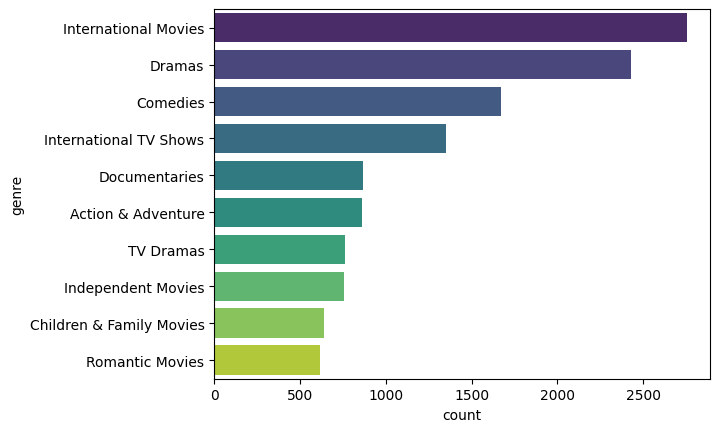

In [ ]:
# Grafico

sns.barplot(
    x = 'count',
    y = "genre",
    data = top_10,
    palette = "viridis"
)

## 5. Conclusiones:
- Redactar hallazgos clave sobre los datos.
- Proponer recomendaciones para contenido, adquisiciones y estrategia regional.

#